# Comparing Audits with Graphs

R2B2 provides several methods for generating 'bulk' audit data. These are espeically useful for creating tables and graphs to compare audits and/or audit parameters. The following is a simple example of generating a graph using the `compute_all_min_winner_ballots()` method.

In [2]:
from r2b2.contest import Contest, ContestType
from r2b2.brla import BayesianRLA as BRLA

import matplotlib.pyplot as plt
import numpy as np

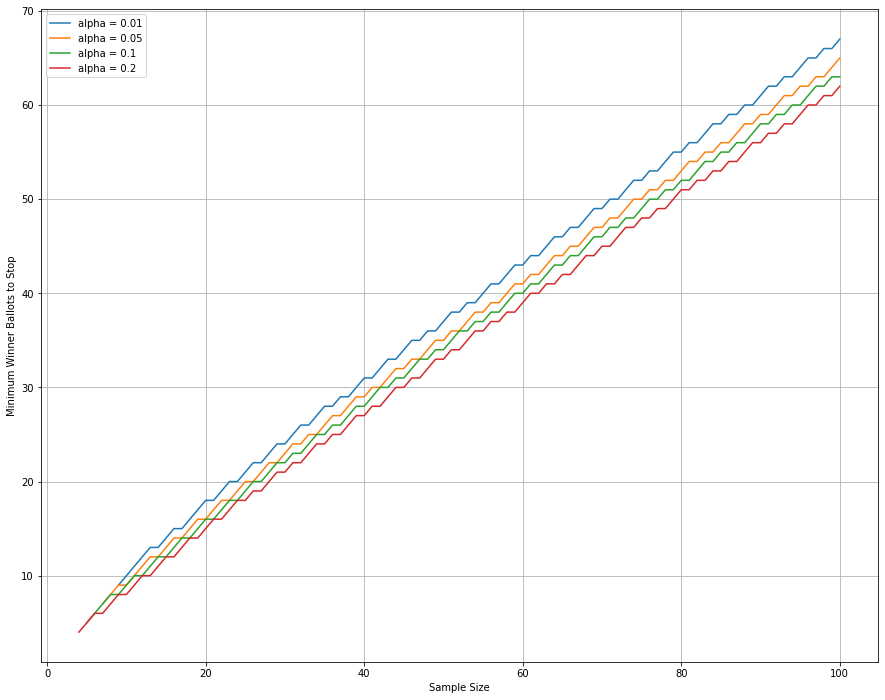

In [8]:
# Create a contest
contest = Contest(1000, {'A': 764, 'B': 236}, 1, ['A'], ContestType.PLURALITY)
# Create a range of all the sample sizes to serve as a x axis
sample_sizes = np.arange(101)

# For various risk limits:
# - Create a BRLA for the risk limit
# - Plot a list of kmins from minimum sample size to 500
risk_limits = [0.01, 0.05, 0.1, 0.2]
kmins = {}
plt.figure(figsize=(15, 12)) # Improves size of plot below
for r in risk_limits:
    audit = BRLA(r, 0.1, contest)
    plt.plot(sample_sizes[audit.min_sample_size:], audit.compute_all_min_winner_ballots(), label='alpha = {}'.format(r))
    
# Configure plot
plt.xlabel('Sample Size')
plt.ylabel('Minimum Winner Ballots to Stop')
plt.legend()
plt.grid()
plt.show()
    